In [ ]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import sklearn
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score

#leer data
df=pd.read_csv('data.csv')
df = df.drop(columns=["Age", "StudentID","Gender","Ethnicity","ParentalEducation","Sports","Music","Volunteering","GradeClass"])
print(df.head())


#Revisión de missing values
print("Valores nulos por columna:")
print(df.isnull().sum())

#Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

   StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  \
0        19.833723         7         1                2                0   
1        15.408756         0         0                1                0   
2         4.210570        26         0                2                0   
3        10.028829        14         0                3                1   
4         4.672495        17         1                3                0   

        GPA  
0  2.929196  
1  3.042915  
2  0.112602  
3  2.054218  
4  1.288061  
Valores nulos por columna:
StudyTimeWeekly    0
Absences           0
Tutoring           0
ParentalSupport    0
Extracurricular    0
GPA                0
dtype: int64

Estadísticas descriptivas:
       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1

'\ny=df[\'GPA\']\nx=df.drop(\'GPA\',axis=1)\n\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\nmodel= LinearRegression()      #CAMBIAR\nmodel.fit(x_train, y_train)\n\ny_pred = model.predict(x_test)\n\nmse = mean_squared_error(y_test, y_pred)\nr2 = r2_score(y_test, y_pred)\n\nprint("Mean Squared Error:", mse)\nprint("R-squared:", r2)\n\n'

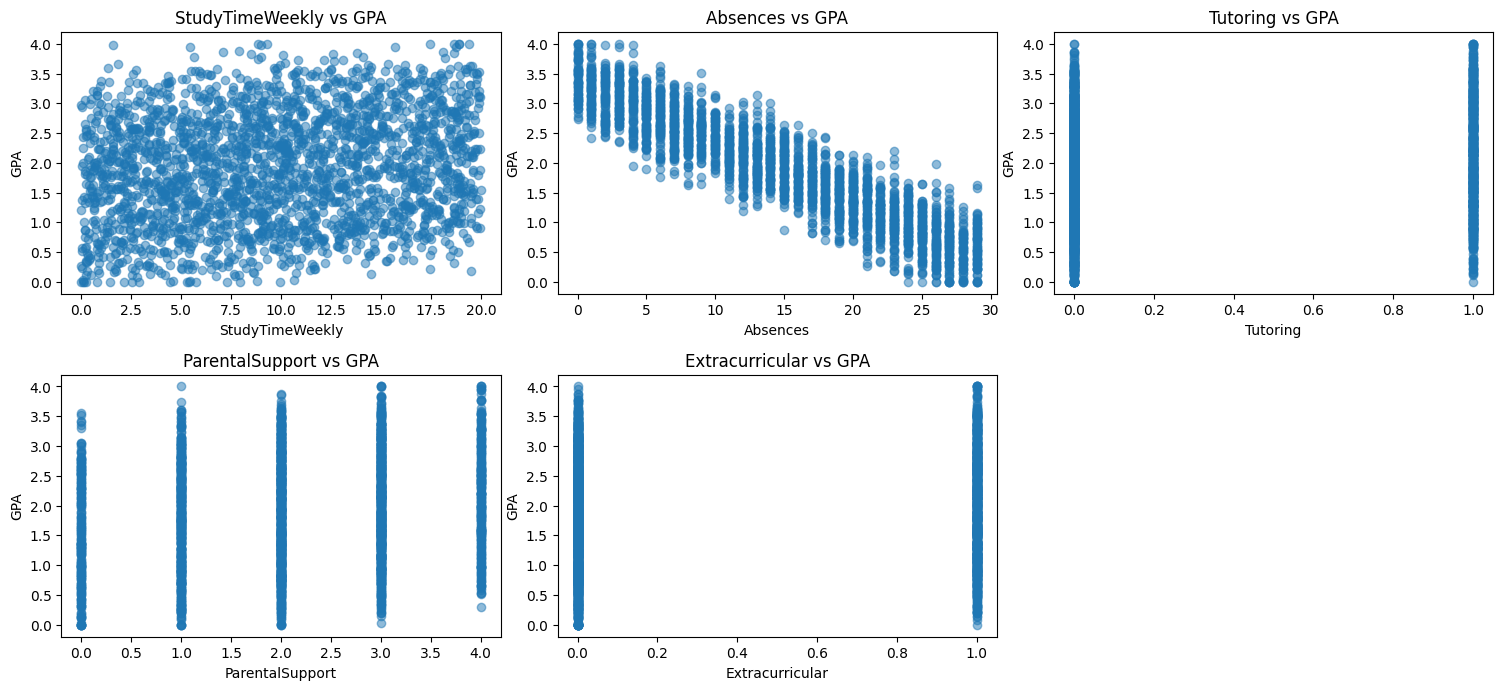

In [ ]:
#Visualización de relaciones entre features y target
target = 'GPA'
features = df.columns.drop(target)


plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.scatter(df[col], df[target], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f'{col} vs {target}')
plt.tight_layout()
plt.show()

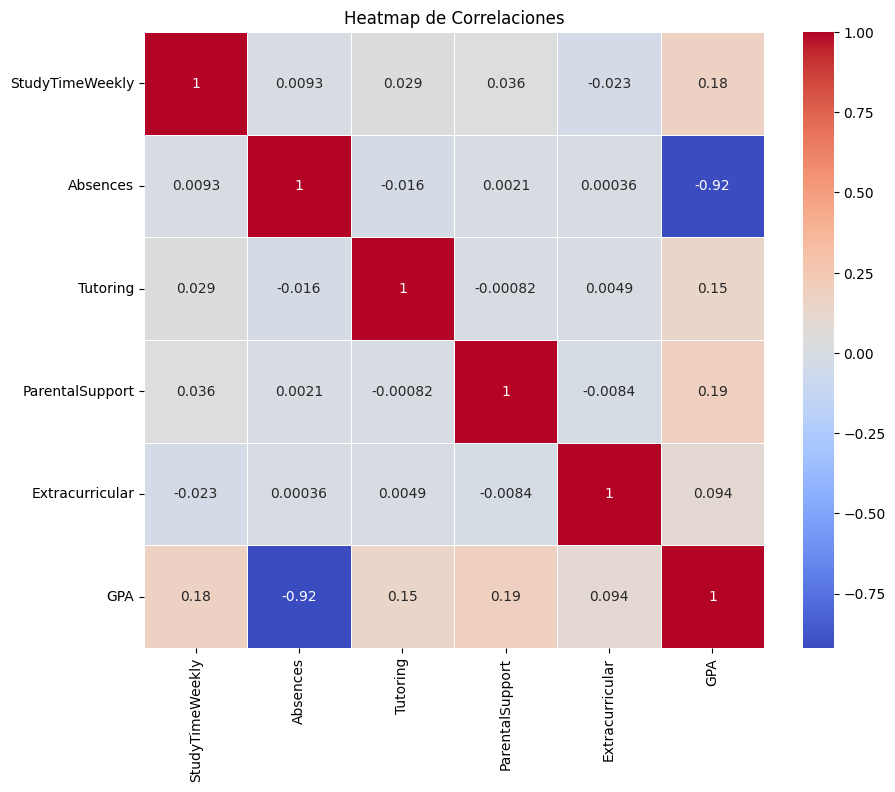

In [ ]:
#Heatmap de correlaciones
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlaciones')
plt.show()

In [ ]:
#MODELO 1: LINEAL
#El heatmap del Task 1 mostró correlaciones claras entre el GPA y varias variables: StudyTimeWeekly (+0.15) y Absences(-0.92). 
# Estas tendencias son monótonas y pueden modelarse adecuadamente con una combinación lineal.




# Preparación de datos
X = df.drop(columns=[target]).values
y = df[target].values.reshape(-1, 1)


# División train/test (80/20)
n = len(X)
n_train = int(0.8 * n)
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Normalización para la red neuronal
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train_n = (X_train - X_mean) / X_std
X_test_n  = (X_test  - X_mean) / X_std

print("Datos preparados: ")
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


#CODIGO DE JAVI
'''
y=df['GPA']
x=df.drop('GPA',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model= LinearRegression()      #CAMBIAR
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

'''


Datos preparados: 
Train: (1913, 5) (1913, 1)
Test : (479, 5) (479, 1)


'\ny=df[\'GPA\']\nx=df.drop(\'GPA\',axis=1)\n\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\nmodel= LinearRegression()      #CAMBIAR\nmodel.fit(x_train, y_train)\n\ny_pred = model.predict(x_test)\n\nmse = mean_squared_error(y_test, y_pred)\nr2 = r2_score(y_test, y_pred)\n\nprint("Mean Squared Error:", mse)\nprint("R-squared:", r2)\n\n'

In [ ]:
# --- Métricas de evaluación ---
def rmse(y_true, y_pred):
    """Root Mean Squared Error"""
    y_true = y_true.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    return float(np.sqrt(np.mean((y_true - y_pred)**2)))

def r2_score(y_true, y_pred):
    """Coeficiente de determinación R²"""
    y_true = y_true.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return float(1 - ss_res/ss_tot)


In [ ]:
# ---- Regresión Lineal Múltiple (OLS) ----
def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

def train_ols(X, y):
    Xb = add_bias(X)
    beta = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y
    return beta

def predict_ols(X, beta):
    Xb = add_bias(X)
    return Xb @ beta

# Entrenamiento y evaluación
beta_lin = train_ols(X_train, y_train)
y_pred_train_lin = predict_ols(X_train, beta_lin)
y_pred_test_lin  = predict_ols(X_test, beta_lin)

print("=== Regresión Lineal Múltiple ===")
print("Train RMSE:", rmse(y_train, y_pred_train_lin))
print("Test  RMSE:", rmse(y_test, y_pred_test_lin))
print("Test  R²  :", r2_score(y_test, y_pred_test_lin))


=== Regresión Lineal Múltiple ===
Train RMSE: 0.2247033196033877
Test  RMSE: 0.21477759986360387
Test  R²  : 0.943511207082573


In [ ]:
import joblib

# este código es para almacenar el modelo


joblib.dump(beta_lin, 'linear_regression_model.pkl')
print("linear_regression_model.pkl")


linear_regression_model.pkl


In [ ]:
import joblib, json
import numpy as np

beta = joblib.load("linear_regression_model.pkl")  # ndarray (n, 1) o (n,)
beta = np.asarray(beta).reshape(-1)               # vector plano

# Define aquí el ORDEN EXACTO de las features que usaste para entrenar X:
features = ["Age","StudyTimeWeekly","Absences","Tutoring","ParentalSupport","Extracurricular"]

# Si beta incluye intercepto primero:
intercept = float(beta[0])
coef = beta[1:].tolist()

cfg = {
    "features": features,
    "coef": coef,
    "intercept": intercept,
    "standardize": False,   # pon True si usaste StandardScaler
    "mean": {},             # llena si standardize=True
    "std":  {},
    "risk_threshold": 2.0
}

with open("model_config.json", "w", encoding="utf-8") as f:
    json.dump(cfg, f, ensure_ascii=False, indent=2)

print("model_config.json listo")
